## *Megan Tan 110598264*
## *Kevin Lin 110329734*
## Stock Market Project

In [1]:
#This box reads in the file and scatter plots the dependent variable spy_close_price against
#the independent variable signal, as well as show 5 lines of the file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = "/Users/Kevin Lin/Desktop/391 Project/data.csv"
df = pd.read_csv(file)
X = df['signal']
y = df['spy_close_price']
date = df['date']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)
plt.figure()
plt.scatter(df['signal'],df['spy_close_price'])
plt.title("Raw Data of dependent variable against independent variable")
plt.ylabel('spy_close_price')
plt.xlabel('signal')

plt.show()
df.head()

<Figure size 640x480 with 1 Axes>

,date,signal,spy_close_price
0,20120103,3.107767,127.495
1,20120104,3.107282,127.700
2,20120105,3.099757,128.040
3,20120106,3.134223,127.710
4,20120109,3.135922,128.020


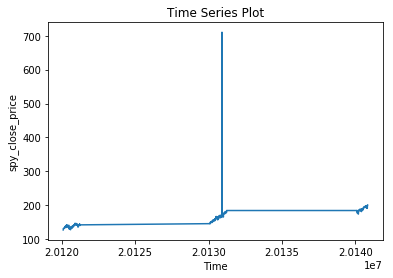

In [2]:
#This box plots a time series plot of the spy close price against time
plt.plot(date,y)
plt.title("Time Series Plot")
plt.ylabel("spy_close_price")
plt.xlabel("Time")
#plt.scatter(date,y)
plt.show()

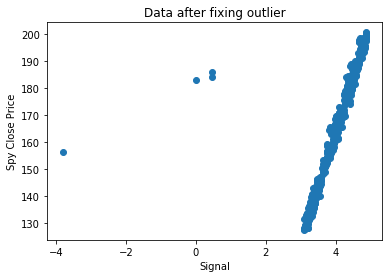

In [3]:
#This box deals with outliers by replacing the outlier value with the mean of the value before and after it
#A scatter plot is then plotted
#Substitute the signal outlier with the mean of two numbers.
X[459] =  (X[459-1] + X[459+2]) /2
X[460] =  (X[460-2] + X[460+1]) / 2 
#Substitute the signal outlier with the mean of two numbers.
y[421] =  (y[421-1] + y[421+3]) /2
y[422] =  (y[422-2] + y[422+2]) / 2 
y[423] =  (y[423-3] + y[423+1]) / 2 

plt.scatter(X, y)
plt.title("Data after fixing outlier")
plt.xlabel("Signal")
plt.ylabel("Spy Close Price")
plt.show()

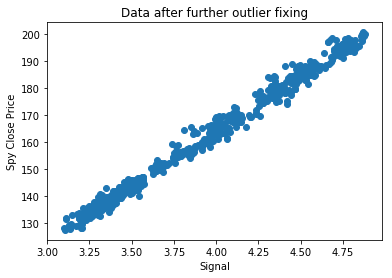

In [4]:
#This box is fixing more outliers with the same method mentioned above.
#A new scatter plot is shown
#Substitute the signal outlier with the mean of two numbers.
X[303] =  (X[303-1] + X[303+1]) /2
X[570] =  (X[570-1] + X[570+3]) / 2 
X[571] =  (X[571-2] + X[571+2]) /2
X[572] =  (X[572-3] + X[572+1]) / 2 

plt.scatter(X, y)
plt.title("Data after further outlier fixing")
plt.xlabel("Signal")
plt.ylabel("Spy Close Price")
plt.show()


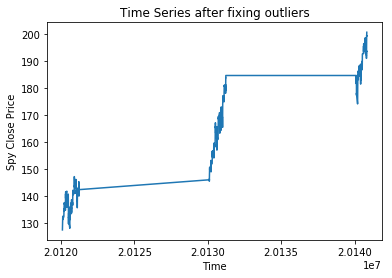

In [5]:
#This box plots the time series of the data after the outliers are fixed
plt.plot(date,y)
plt.title("Time Series after fixing outliers")
plt.ylabel("Spy Close Price")
plt.xlabel("Time")
plt.show()

Intercept: 
 [1.60484829]
Coefficients: 
 [[40.69326334]]
Mean squared error: 5.01
R-squared = : 0.99


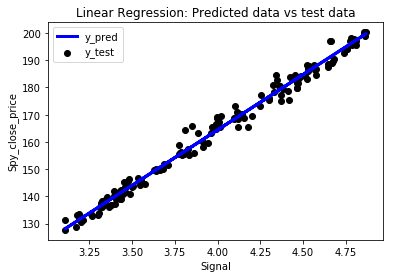

In [6]:
#This box is used to perform linear regression on the data
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#X = df['signal']
#y = df['spy_close_price']

# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

#The intercept
print('Intercept: \n' ,regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared = : %.2f' % r2_score(y_test, y_pred))

# Plot outputs
test = plt.scatter(X_test, y_test,  color='black', label = "y_test")
pred, = plt.plot(X_test, y_pred, color='blue', linewidth=3, label = "y_pred")
plt.legend()
plt.title("Linear Regression: Predicted data vs test data")
plt.ylabel("Spy_close_price")
plt.xlabel("Signal")

#plt.xticks(())
#plt.yticks(())

plt.show()

R-Square using Lasso : 0.989030
Alpha:  0.01


C:\Users\Kevin Lin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


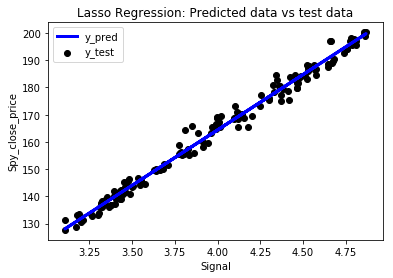

In [7]:
# In here, we are using Lasso to predict the R-Square value
from sklearn.linear_model import LassoCV

alphas = np.arange(0.01,1,0.01)
lasso = LassoCV(alphas = alphas)
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("R-Square using Lasso : %f" % r2_score_lasso)
print("Alpha: ", lasso.alpha_)
# Plot outputs
test = plt.scatter(X_test, y_test,  color='black', label = "y_test")
pred, = plt.plot(X_test, y_pred, color='blue', linewidth=3, label = "y_pred")
plt.legend()
plt.title("Lasso Regression: Predicted data vs test data")
plt.ylabel("Spy_close_price")
plt.xlabel("Signal")
plt.show()


C:\Users\Kevin Lin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-Square using Elastic Net : 0.988992
Alpha:  0.1
l1_ratio:  0.9999999999999996


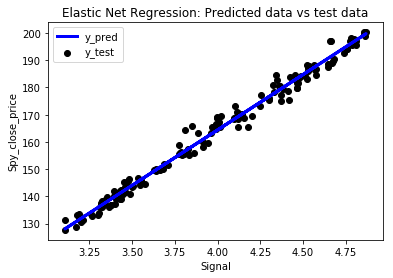

In [8]:
#We are using elastic net to predict R-Square value
from sklearn.linear_model import ElasticNetCV
alphas = np.arange(0.1,1,0.01)
l1s = np.arange(0.1,1.01,0.01)
enet = ElasticNetCV(alphas=alphas, l1_ratio = l1s)
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print("R-Square using Elastic Net : %f" % r2_score_enet)
print("Alpha: ", enet.alpha_)
print("l1_ratio: ", enet.l1_ratio_)
#plot data
test = plt.scatter(X_test, y_test,  color='black', label = "y_test")
pred, = plt.plot(X_test, y_pred, color='blue', linewidth=3, label = "y_pred")
plt.legend()

plt.title("Elastic Net Regression: Predicted data vs test data")
plt.ylabel("Spy_close_price")
plt.xlabel("Signal")
plt.show()

When predicting data of R-Square, Linear Regression seems to be a little more accurate than Lasso 
and Elastic net. This is as expected because multicollinearity is not a problem as there is only one independent variable. Furthermore, the data is not sparse, so elastic net regression would not work best.

In [21]:
import tensorflow as tf

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

def init_weights(shape):
    """ Weight initialization """
    weights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(weights)

def forwardprop(X, w_1, w_2):
    """
    Forward-propagation.
    IMPORTANT: yhat is not softmax since TensorFlow's softmax_cross_entropy_with_logits() does that internally.
    """
    h    = tf.nn.sigmoid(tf.matmul(X, w_1))  # The \sigma function
    yhat = tf.matmul(h, w_2)  # The \varphi function
    return yhat


x_size = X_train.shape[1]   # Number of input nodes: 4 features and 1 bias
h_size = 256                # Number of hidden nodes
y_size = y_train.shape[1]

# Symbols
X = tf.placeholder("float", shape=[None, x_size])
y = tf.placeholder("float", shape=[None, y_size])
# Weight initializations
w_1 = init_weights((x_size, h_size))
w_2 = init_weights((h_size, y_size))


# Forward propagation
yhat    = forwardprop(X, w_1, w_2)
predict = tf.argmax(yhat, axis=1)

# Backward propagation
cost    = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(40):
    # Train with each example
    for i in range(len(X_train)):
        sess.run(updates, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})

    train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(predict, feed_dict={X: X_train, y: y_train}))
    test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(predict, feed_dict={X: X_test, y: y_test}))

    print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
            % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))









Epoch = 1, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 2, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 3, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 4, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 5, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 6, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 7, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 8, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 9, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 10, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 11, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 12, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 13, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 14, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 15, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 16, train accuracy = 100.00%, test accuracy = 100.00%
Epoch = 17, train